<a href="https://colab.research.google.com/github/Naman397/Exploratory_Data_Analysis/blob/main/22BDS0021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv')
df.head(6)

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,1,0,786,190,10,0.1,0,3,0,0,0
1,2,0,794,182,10,0.0,0,3,0,0,0
2,3,0,798,178,20,0.0,0,1,0,0,0
3,4,0,800,176,70,0.3,0,1,0,1,0
4,5,0,804,172,40,0.3,0,1,0,1,0
5,6,0,808,168,60,0.3,0,1,0,1,0


In [2]:
df.shape

(1592, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1592 non-null   int64  
 1   Gunnel    1592 non-null   int64  
 2   Time      1592 non-null   int64  
 3   Fromlow   1592 non-null   int64  
 4   Slope     1592 non-null   int64  
 5   Rw        1592 non-null   float64
 6   Amphiso   1592 non-null   int64  
 7   Subst     1592 non-null   int64  
 8   Pool      1592 non-null   int64  
 9   Water     1592 non-null   int64  
 10  Cobble    1592 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 136.9 KB


In [ ]:
#Missing values per column.

df.isnull().sum()

,0
rownames,0
Gunnel,0
Time,0
Fromlow,0
Slope,0
Rw,0
Amphiso,0
Subst,0
Pool,0
Water,0


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Summary Statistics

df.describe()

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,796.500000,0.030151,705.243719,149.408920,9.503769,0.527073,0.464196,3.105528,0.202261,0.508794,0.190955
std,459.715129,0.171056,135.853638,82.662326,15.889862,0.421278,0.899039,2.787720,0.401812,0.500080,0.393177
min,1.000000,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,398.750000,0.000000,623.000000,71.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,796.500000,0.000000,712.500000,158.000000,0.000000,0.600000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1194.250000,0.000000,810.000000,224.250000,10.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
max,1592.000000,1.000000,983.000000,304.000000,90.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000


## Data Handling — Type Conversion Example



In [4]:
# Cell 6
obj_cols = df.select_dtypes(include='object').columns.tolist()
print("Object columns:", obj_cols)

for c in obj_cols:
    try:
        df[c + "_numeric_try"] = pd.to_numeric(df[c].str.replace(',',''), errors='coerce')
    except Exception:
        pass

converted = [c for c in df.columns if c.endswith("_numeric_try")]
if converted:
    display(df[converted].head())
    df.drop(columns=converted, inplace=True)


Object columns: []


## Data Cleaning — Missing Values, Duplicates


In [9]:
# Cell 7: Remove duplicates
if df.duplicated().any():
    df = df.drop_duplicates().reset_index(drop=True)


In [8]:
# Cell 8: Missing value handling
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if df[c].isnull().sum() > 0:
        df[c].fillna(df[c].median(), inplace=True)

cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
    if df[c].isnull().sum() > 0:
        df[c].fillna(df[c].mode().iloc[0], inplace=True)

print("Missing values after imputation:")
display(df.isnull().sum())


Missing values after imputation:


,0
rownames,0
Gunnel,0
Time,0
Fromlow,0
Slope,0
Rw,0
Amphiso,0
Subst,0
Pool,0
Water,0


## Univariate Analysis — Numeric


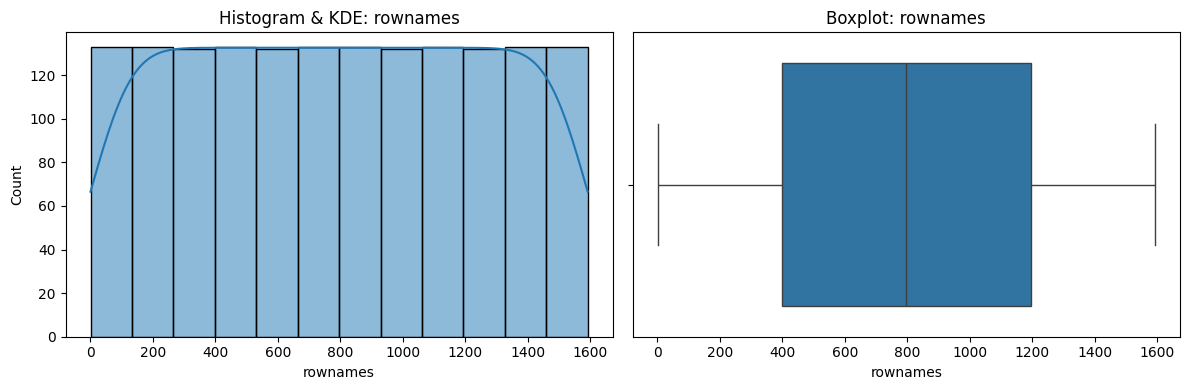

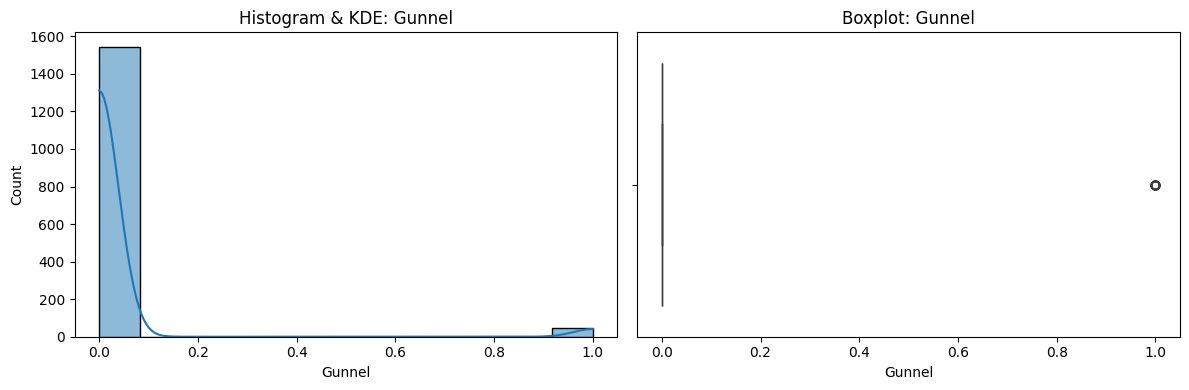

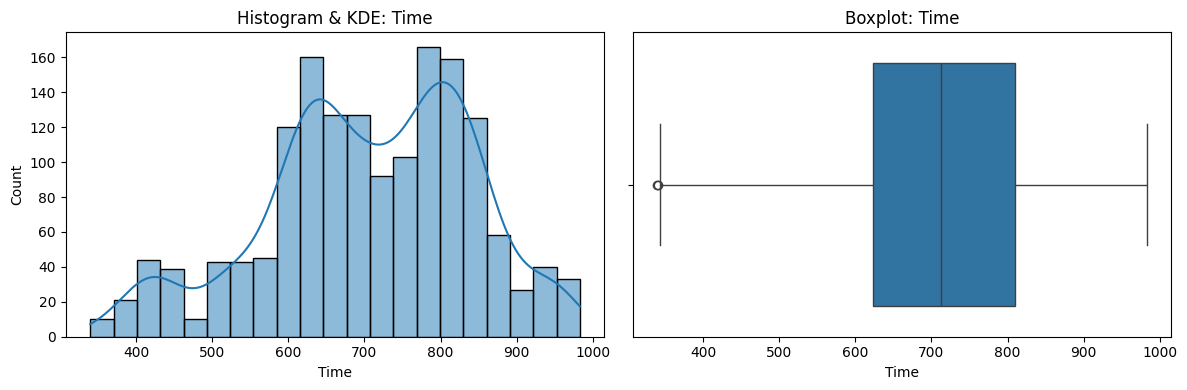

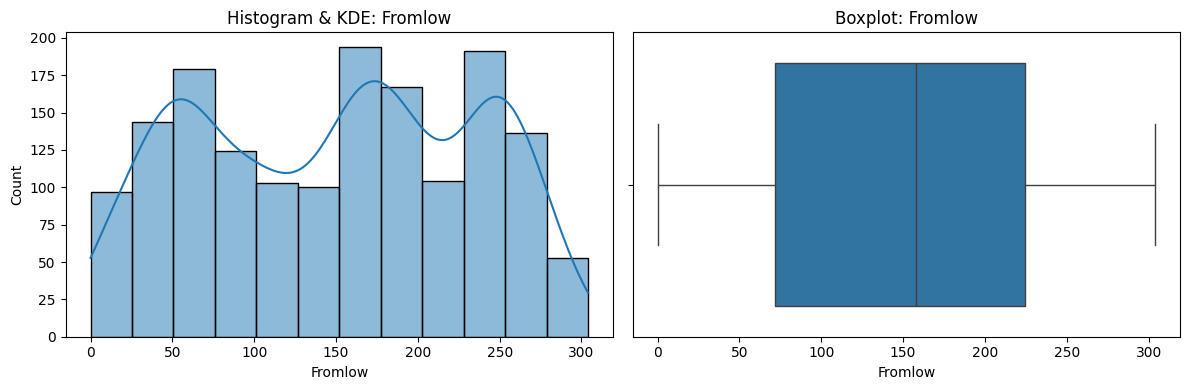

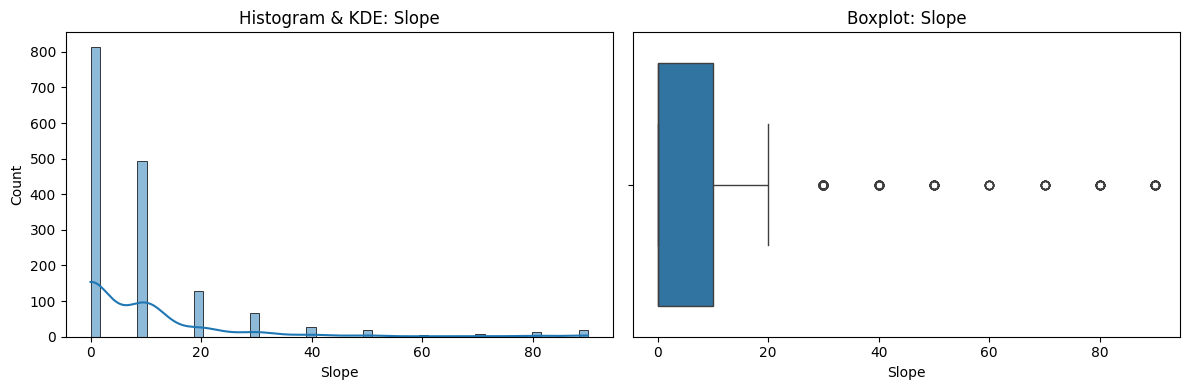

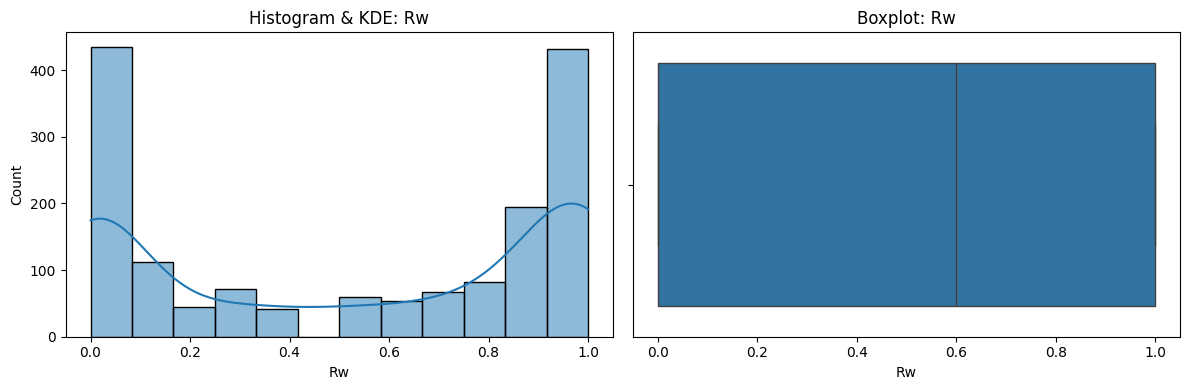

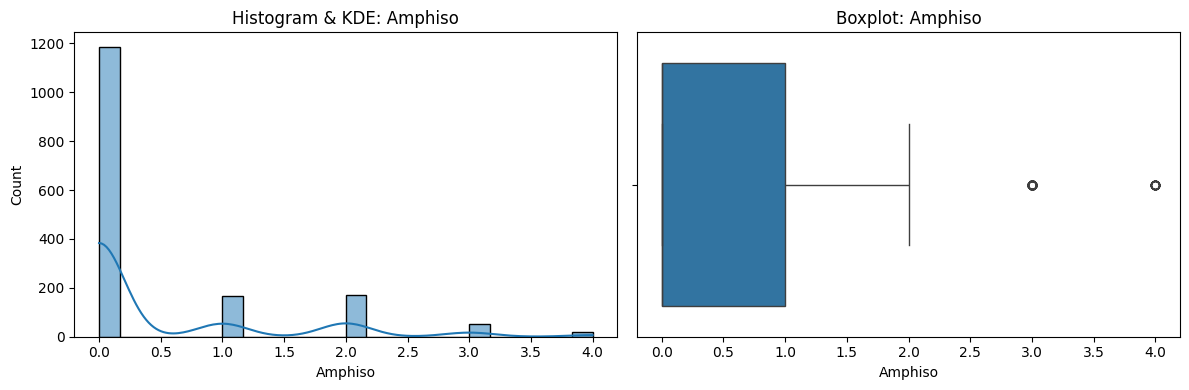

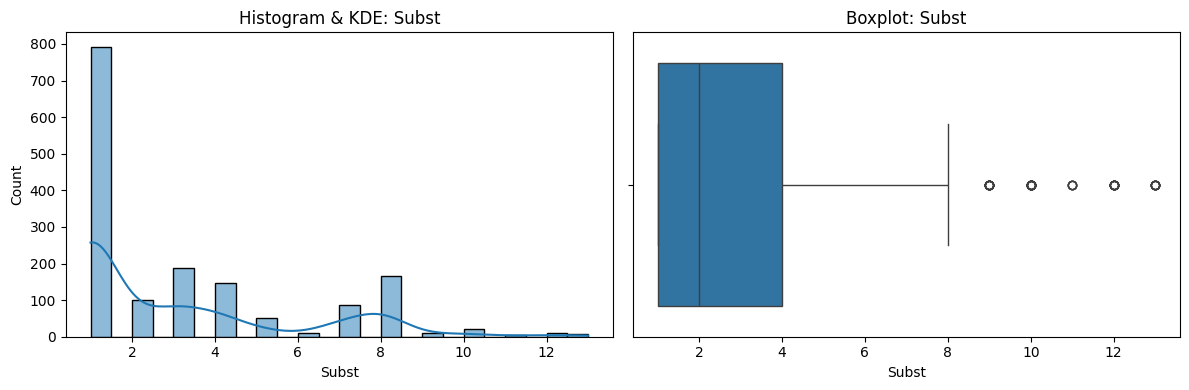

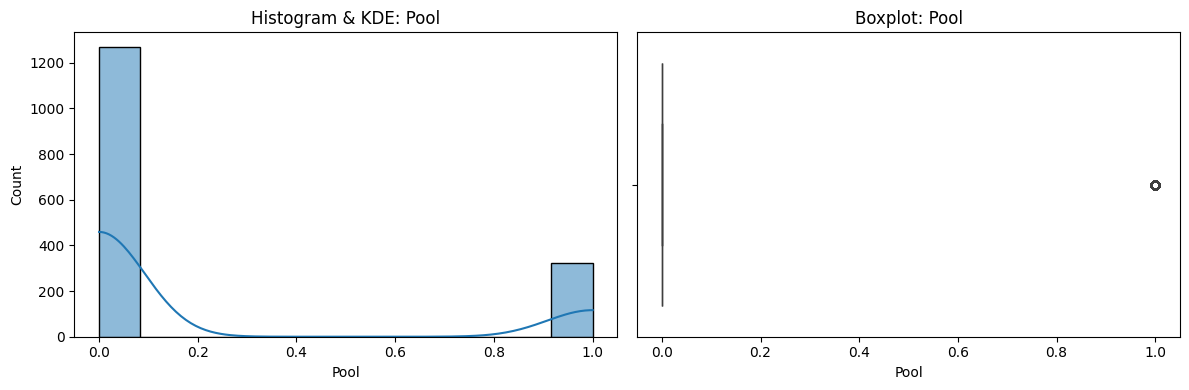

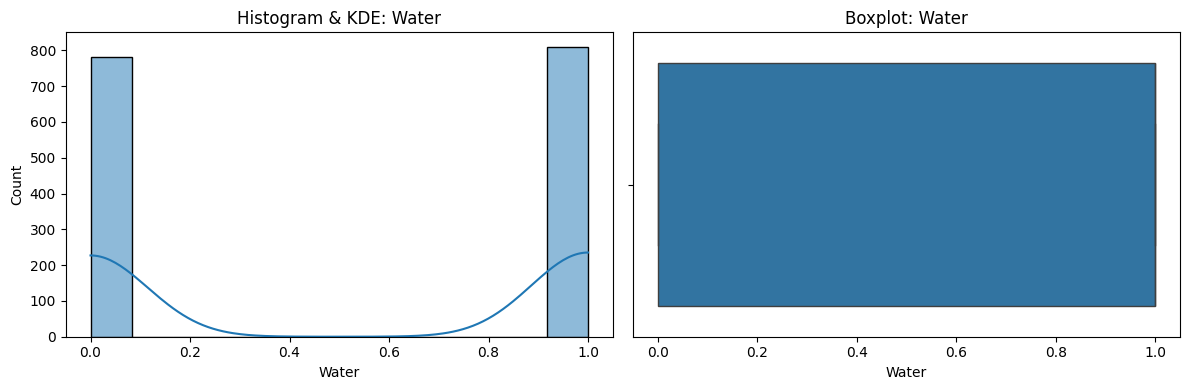

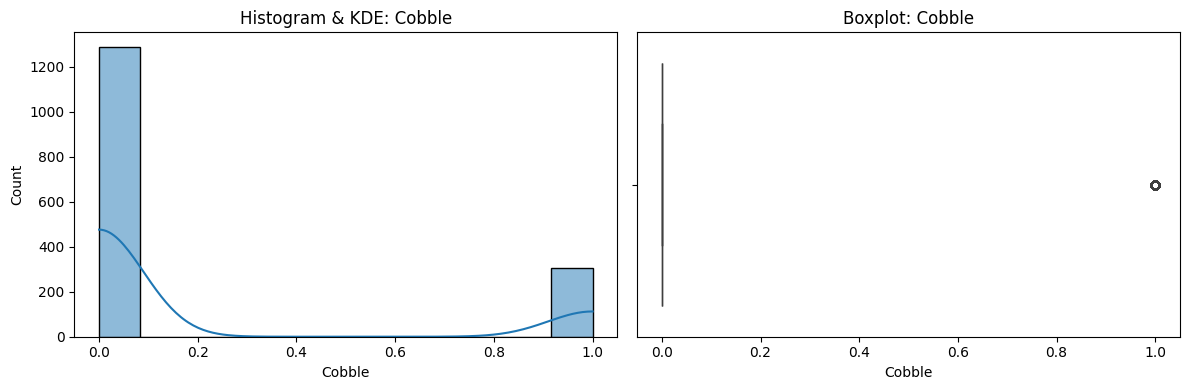

In [11]:
# Cell 9
import matplotlib.pyplot as plt
import seaborn as sns
for c in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f"Histogram & KDE: {c}")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.show()


## Bivariate Analysis — Correlation Heatmap


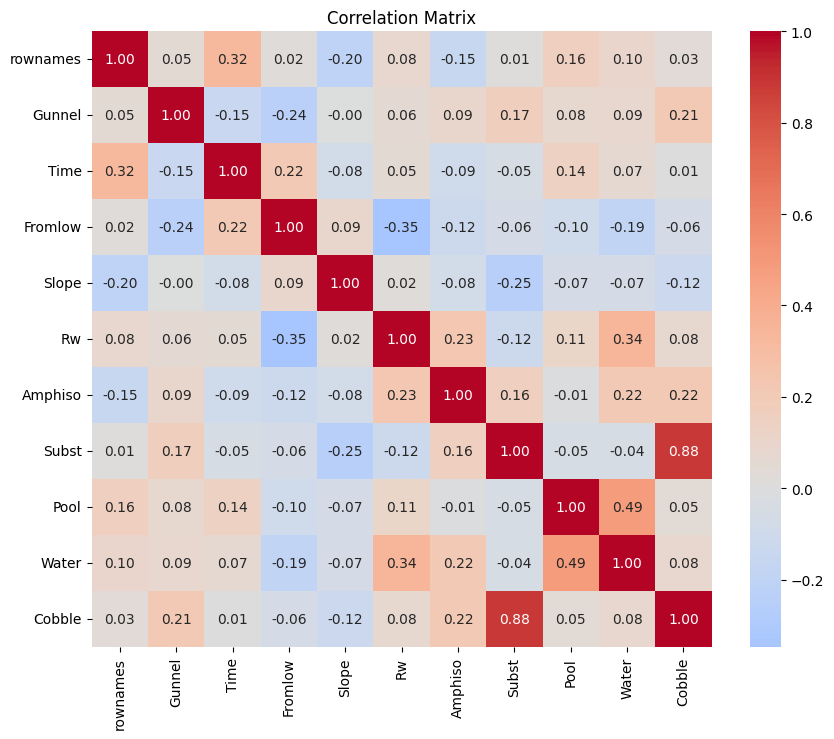

In [14]:
# Cell 11
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title("Correlation Matrix")
    plt.show()


## Pairplot


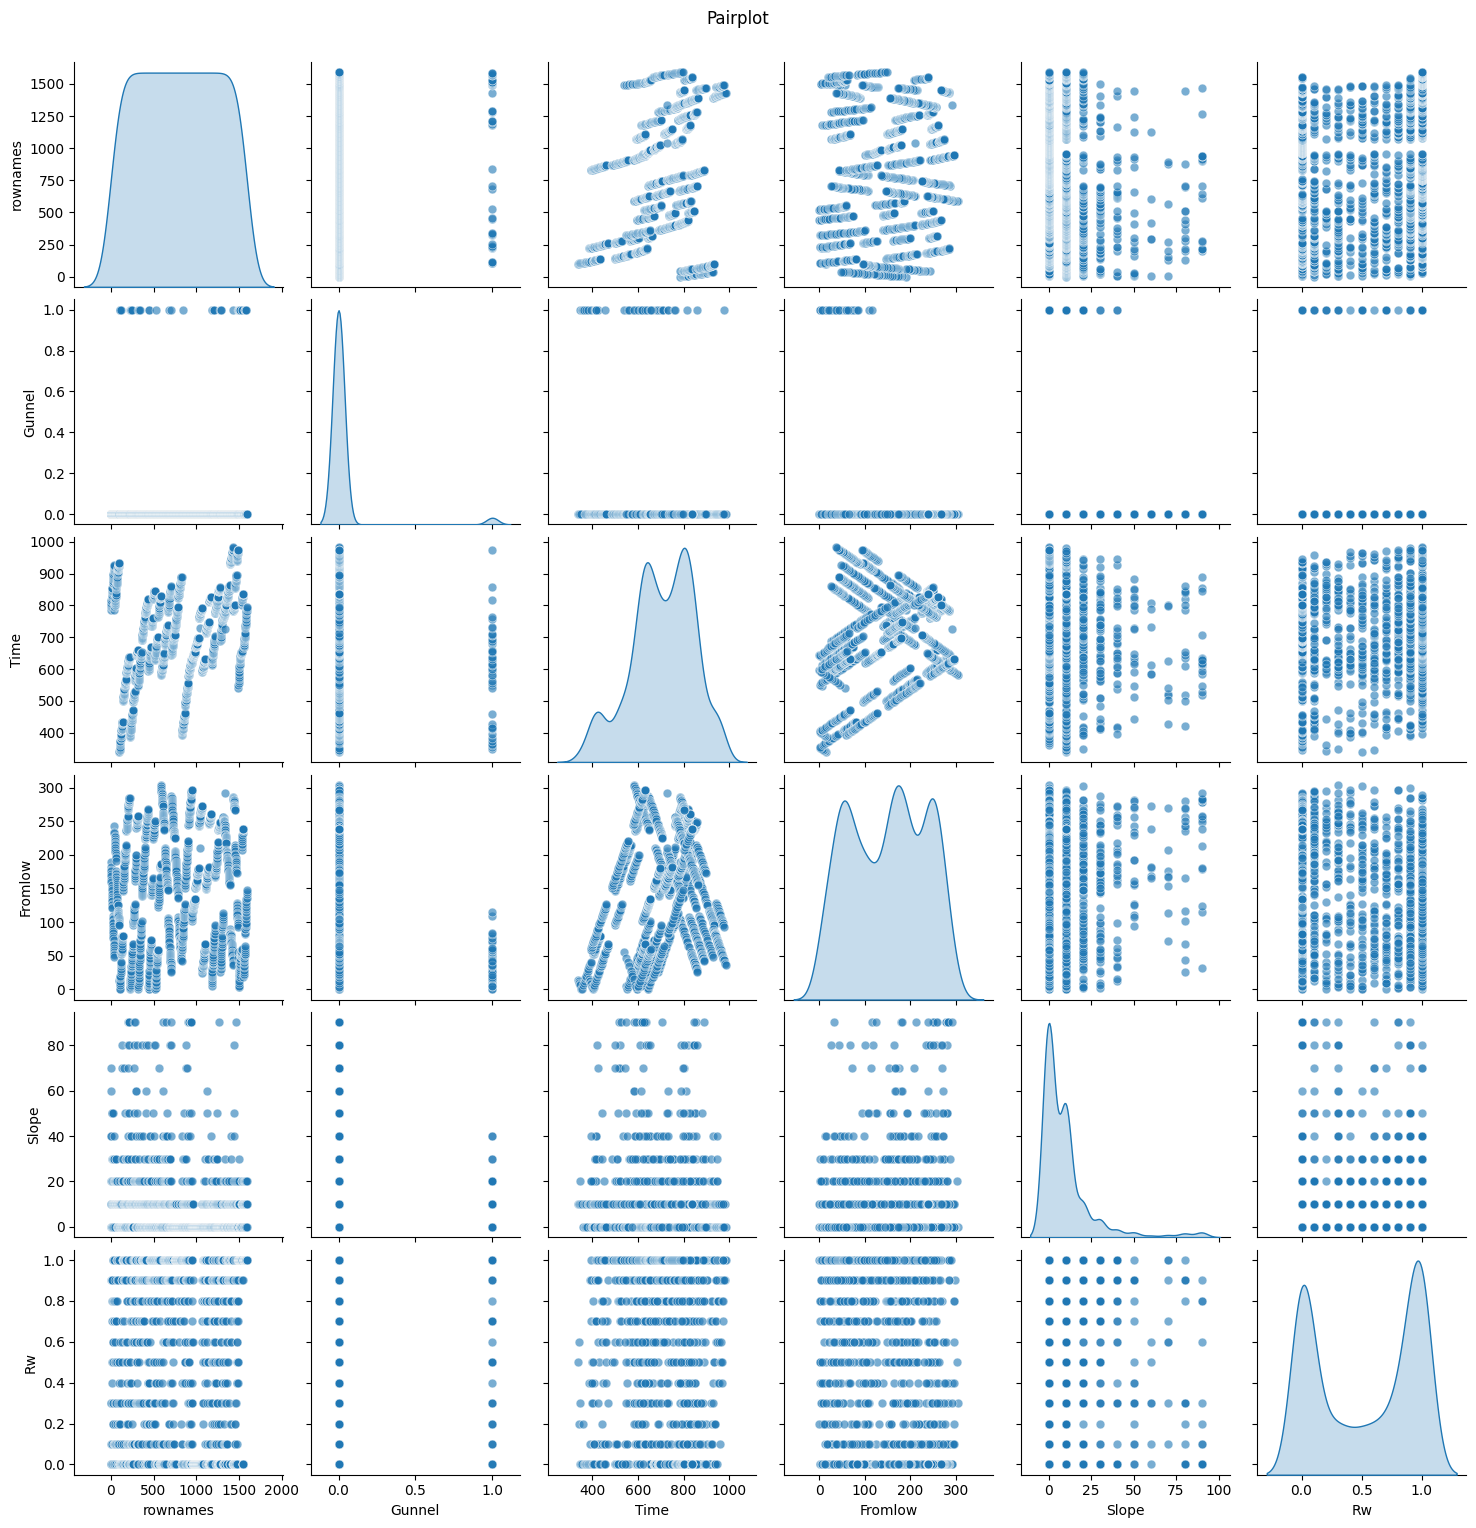

In [15]:
# Cell 12
if len(num_cols) > 1:
    sample_cols = num_cols if len(num_cols) <= 6 else num_cols[:6]
    sns.pairplot(df[sample_cols].dropna(), diag_kind='kde', plot_kws={'alpha':0.6, 's':40})
    plt.suptitle("Pairplot", y=1.02)
    plt.show()


## Outlier Detection — IQR Method


In [17]:
# Cell 15
outlier_summary = {}
for c in num_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    n_out = ((df[c] < lower) | (df[c] > upper)).sum()
    outlier_summary[c] = {'lower': lower, 'upper': upper, 'n_outliers': int(n_out)}

pd.DataFrame(outlier_summary).T



,lower,upper,n_outliers
rownames,-794.5,2387.5,0.0
Gunnel,0.0,0.0,48.0
Time,342.5,1090.5,2.0
Fromlow,-157.0,453.0,0.0
Slope,-15.0,25.0,158.0
Rw,-1.5,2.5,0.0
Amphiso,-1.5,2.5,72.0
Subst,-3.5,8.5,52.0
Pool,0.0,0.0,322.0
Water,-1.5,2.5,0.0


## Multivariate Analysis — Groupby Example


In [19]:
# Cell 16
if cat_cols and num_cols:
    grp = df.groupby(cat_cols[0])[num_cols].agg(['mean','median','count'])
    display(grp.head(10))
